In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [2]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[2], polygon_example_1[4])]

In [3]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()

In [4]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [5]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()

## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

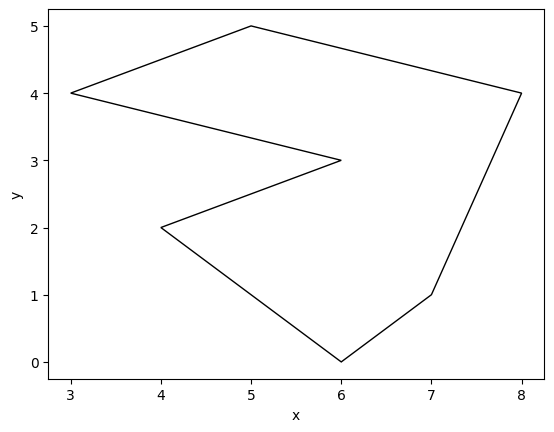

In [6]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

x:  5.120967741935484  y:  6.904761904761905
x:  4.35483870967742  y:  6.715367965367966
x:  3.3669354838709675  y:  5.633116883116884
x:  3.1854838709677415  y:  3.928571428571429
x:  5.32258064516129  y:  1.9264069264069263
x:  7.258064516129032  y:  4.172077922077922
x:  5.685483870967742  y:  4.686147186147187
x:  8.104838709677418  y:  5.200216450216451
x:  6.290322580645162  y:  5.443722943722944
x:  8.689516129032258  y:  6.201298701298702


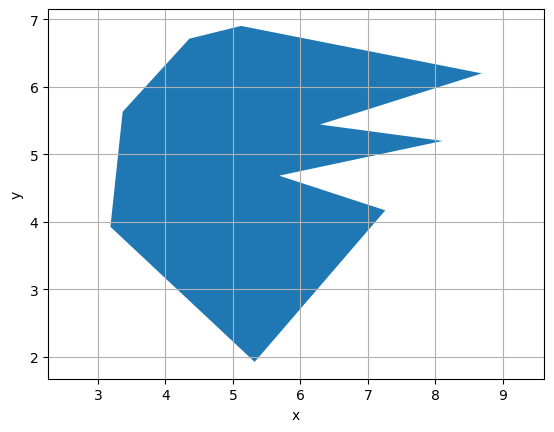

In [7]:
%matplotlib tk
from matplotlib.backend_bases import MouseButton
'''
Cała ta funkcja umożliwia zadawanie wierzchołków z myszki.
Po uruchomieniu kodu, włączy się okno, na którym należy klikać lewym przyciskiem myszy
w miejsca, w których chcemy, aby były nasze kolejne wierzchołki. Istnieje możliwość zapisania
figury, jeśli klikniemy w lewym dolnym rogu na ikonkę zapisu.
'''
polygon = []

fig, ax = plt.subplots()
ax.set_title('Polygon')
plt.xlim(0, 10)
plt.ylim(0, 10)

def on_click(event):
    if event.button is MouseButton.LEFT:
        x = event.xdata
        y = event.ydata
        polygon.append((x, y))
        ax.plot(*polygon[-1], marker='.', color='blue')
        plt.show()

plt.connect('button_press_event', on_click)
plt.show(block=True)
for x, y in polygon:
    print("x: ", x, " y: ", y)


%matplotlib inline
vis = Visualizer()
vis.add_polygon(polygon)
vis.add_grid()
vis.axis_equal()
vis.show()

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [8]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    n = len(polygon)
    if n < 3:
        return False 

    max_index = max(range(n), key=lambda i: polygon[i][1])
    min_index = min(range(n), key=lambda i: polygon[i][1])

    i = max_index
    while True:
        next_i = (i + 1) % n
        if polygon[next_i][1] > polygon[i][1]:
            return False
        i = next_i
        if i == min_index:
            break

    i = min_index
    while True:
        next_i = (i + 1) % n
        if polygon[next_i][1] < polygon[i][1]:
            return False
        i = next_i
        if i == max_index:
            break

    return True

Przeprowadź test poprawności powyższej funkcji.

In [9]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Sprawdź monotoniczność swojego wielokątu.

In [10]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których zaczyna się monotoniczny spadek
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji.
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny.
- prawidłowy, pozostałe przypadki, jeden sąsiad powyżej, drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

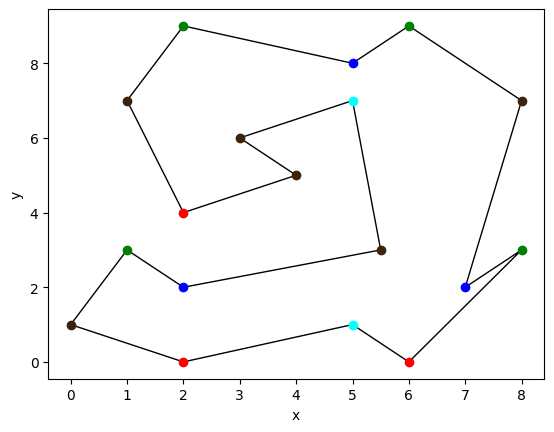

In [11]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [12]:
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    def left(o, a, b):
        return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0]) > 0
    
    n = len(polygon)
    res = [-1 for _ in range(n)]
    for i in range(n):
        curr_y = polygon[i][1]
        prev_index = (i - 1) % n
        next_index = (i + 1) % n

        if curr_y > polygon[prev_index][1] and curr_y > polygon[next_index][1]:
            if left(polygon[next_index], polygon[prev_index], polygon[i]):
                res[i] = 0
            else: res[i] = 3
        
        elif curr_y < polygon[prev_index][1] and curr_y < polygon[next_index][1]:
            if left(polygon[next_index], polygon[prev_index], polygon[i]):
                res[i] = 1
            else: res[i] = 2
        
        else: res[i] = 4
    
    return res



Przeprowadź test poprawności powyższej funkcji. 

In [13]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.000s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

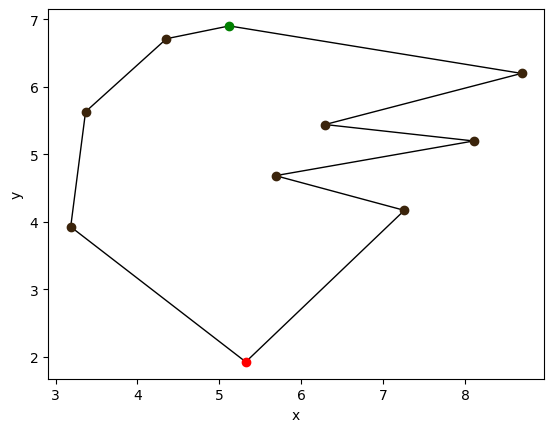

In [14]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

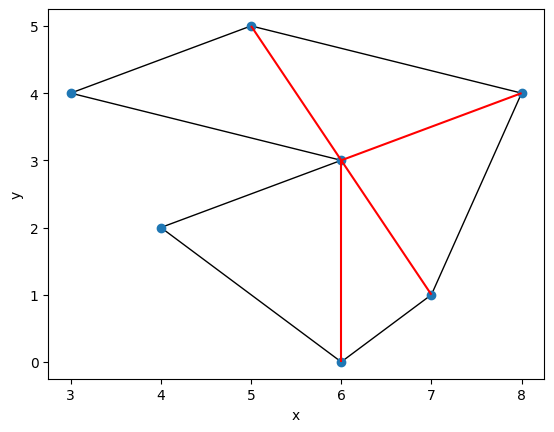

In [15]:
draw_polygon_tri(polygon_example_1, polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [16]:
def triangulation(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    def left(o, a, b):
        return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0]) > 0
    print(polygon)
    n = len(polygon)
    if n < 4:
        return []
    max_index = max(range(n), key=lambda i: polygon[i][1])
    min_index = min(range(n), key=lambda i: polygon[i][1])
    min_point = polygon[min_index]
    min_point_neighbors = [polygon[(min_index + 1) % n], polygon[(min_index - 1) % n]]

    polygon_better = [] #(x,y,Z,i), gdzie Z oznacza, który łancuch, 1 - lewy, 2 - prawy, 0 - punkt skrajny a i jest indeksem w oryginalnym
    polygon_better.append((polygon[max_index][0], polygon[max_index][1], 0, max_index))
    polygon_better.append((polygon[min_index][0], polygon[min_index][1], 0, min_index))

    i = (max_index + 1) % n
    while(i is not min_index):
        polygon_better.append((polygon[i][0], polygon[i][1], 1, i))
        i = (i + 1) % n
    
    i = (min_index + 1) % n
    while(i is not max_index):
        polygon_better.append((polygon[i][0], polygon[i][1], 2, i))
        i = (i + 1) % n

    polygon_better.sort(key=lambda x: x[1], reverse=True)

    stack = [polygon_better[0], polygon_better[1]]
    res = []

    for v in polygon_better[2:]:
        if v[2] != stack[-1][2]:
            while len(stack) > 1:
                v_top = stack.pop()
                res.append([(v[0], v[1], v[3]), (v_top[0], v_top[1], v_top[3])])
            stack = [v_top, v]
        
        else:
            while len(stack) > 1:
                v_top = stack.pop()
                nd_top = stack[-1]
                if (v[2] == 1 and not left(v, v_top, nd_top)) or (v[2] == 2 and left(v, v_top, nd_top)):
                    res.append([(v[0], v[1], v[3]), (nd_top[0], nd_top[1], nd_top[3])])
                else:
                    stack.append(v_top)
                    break
            stack.append(v)
    
    res = [diag for diag in res if not (
    ((diag[0][0], diag[0][1]) == min_point and (diag[1][0], diag[1][1]) in min_point_neighbors) or
    ((diag[1][0], diag[1][1]) == min_point and (diag[0][0], diag[0][1]) in min_point_neighbors))]


    res_index = []
    for diag in res:
        i1 = diag[0][2]
        i2 = diag[1][2]
        res_index.append([i1,i2])
    return res_index

polygon = [(6,6),(3,8),(-1,4),(0,1.5),(-2,0),(3,-2),(7,1),(4,2),(7,3),(4,5)]
chuj = triangulation(polygon)
print(chuj)






[(6, 6), (3, 8), (-1, 4), (0, 1.5), (-2, 0), (3, -2), (7, 1), (4, 2), (7, 3), (4, 5)]
[[9, 1], [2, 9], [8, 2], [7, 2], [3, 7], [6, 3], [4, 6]]


Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [17]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: [(0.030693547033494514, -0.0404187105216232), (0.008516127678655797, 0.0360825149685729), (0.0003104825173654846, 0.014850897321514067), (-0.01410484006327968, -0.0016625830706427924), (-0.03384274328908614, -0.01446895561966241), (-0.04493145296650549, -0.0188500830706428)]
Passed
	Test 2: [(-0.0011310497406990389, 0.05034364616169651), (-0.03018346909553775, 0.03686325400483377), (-0.042159275547150654, 0.0038362932205200373), (-0.02641330780521517, -0.029190667563793703), (0.0006431438076880541, -0.046041157759872144), (0.027477821227042898, -0.029527677367715277), (0.03235685348510742, 0.001140214789147484), (0.028586692194784838, 0.02911202851463769)]
Passed
	Test 3: [(0.002417337356075161, 0.04811376394010061), (-0.006453630385860332, 0.03126327374402216), (-0.024417340063279683, 0.021152979626375107), (-0.006675404579408711, 0.009020626685198624), (-0.034175404579408715, -0.0024377066481347104), (-0.006231856192311938, -0.013559030177546477), (-0.04592943

Zwizualizuj powstały wielokąt podzielony na trójkąty.

[(6, 6), (3, 8), (-1, 4), (0, 1.5), (-2, 0), (3, -2), (7, 1), (4, 2), (7, 3), (4, 5)]


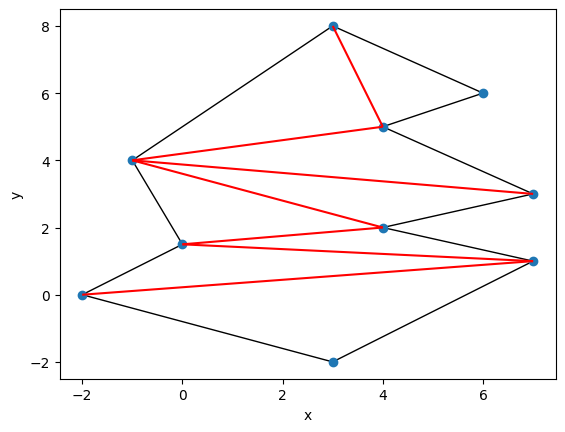

In [18]:
tri = triangulation(polygon)
draw_polygon_tri(polygon, [(polygon[x], polygon[y]) for (x, y) in tri])

In [24]:
# Wyświetlanie kroków algorytmu
def triangulation_draw(polygon):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki o indeksach 1 i 5 oraz 2 i 3
    """
    vis = Visualizer()
    vis.add_grid()
    vis.add_point(polygon, color='blue')
    vis.add_polygon(polygon, fill = False)

    def left(o, a, b):
        return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0]) > 0
    
    n = len(polygon)
    if n < 4:
        return []
    max_index = max(range(n), key=lambda i: polygon[i][1])
    min_index = min(range(n), key=lambda i: polygon[i][1])
    min_point = polygon[min_index]
    min_point_neighbors = [polygon[(min_index + 1) % n], polygon[(min_index - 1) % n]]

    polygon_better = [] #(x,y,Z,i), gdzie Z oznacza, który łancuch, 1 - lewy, 2 - prawy, 0 - punkt skrajny a i jest indeksem w oryginalnym
    polygon_better.append((polygon[max_index][0], polygon[max_index][1], 0, max_index))
    polygon_better.append((polygon[min_index][0], polygon[min_index][1], 0, min_index))

    i = (max_index + 1) % n
    while(i is not min_index):
        polygon_better.append((polygon[i][0], polygon[i][1], 1, i))
        i = (i + 1) % n
    
    i = (min_index + 1) % n
    while(i is not max_index):
        polygon_better.append((polygon[i][0], polygon[i][1], 2, i))
        i = (i + 1) % n

    polygon_better.sort(key=lambda x: x[1], reverse=True)

    stack = [polygon_better[0], polygon_better[1]]
    res = []

    for v in polygon_better[2:]:
        if v[2] != stack[-1][2]:
            while len(stack) > 1:
                v_top = stack.pop()
                res.append([(v[0], v[1], v[3]), (v_top[0], v_top[1], v_top[3])])
            stack = [v_top, v]
        
        else:
            while len(stack) > 1:
                v_top = stack.pop()
                nd_top = stack[-1]
                if (v[2] == 1 and not left(v, v_top, nd_top)) or (v[2] == 2 and left(v, v_top, nd_top)):
                    res.append([(v[0], v[1], v[3]), (nd_top[0], nd_top[1], nd_top[3])])
                else:
                    stack.append(v_top)
                    break
            stack.append(v)
    
    res = [diag for diag in res if not (
    ((diag[0][0], diag[0][1]) == min_point and (diag[1][0], diag[1][1]) in min_point_neighbors) or
    ((diag[1][0], diag[1][1]) == min_point and (diag[0][0], diag[0][1]) in min_point_neighbors))]

    for diag in res:
        vis.add_line_segment(((diag[0][0], diag[0][1]),(diag[1][0], diag[1][1])))


    res_index = []
    for diag in res:
        i1 = diag[0][2]
        i2 = diag[1][2]
        res_index.append([i1,i2])
    return res_index, vis

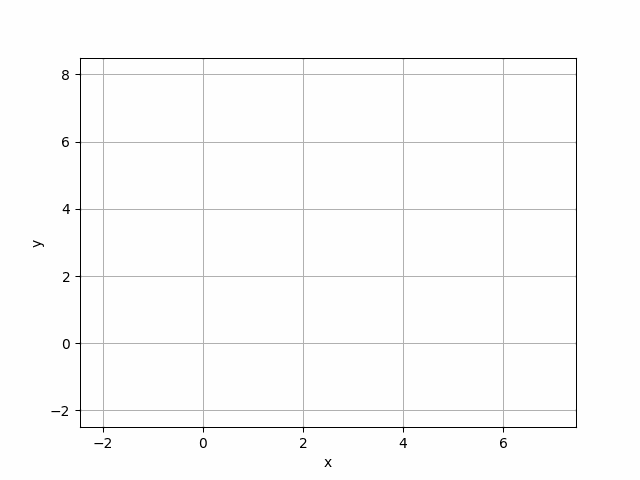

In [25]:
result, visual = triangulation_draw(polygon)
visual.show_gif(interval=1000)